In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("dataset_1672182_resit.csv")
df.head()

,survey_id,gender,study_domain,study_year,avg_grade,housing,budget,relationship,social_events,drinks
0,acd7283f-8d05-4d1b-a1e7-4d09327e04b0,female,social sciences,fourth,7.45,other,average,no,average,6
1,91e1cf0e-fd57-4cfe-b485-c34ae4130816,female,law,fourth,6.85,parents,high,yes,average,9
2,fcd6549e-ca3f-44cd-9f10-589f904bea47,female,business,fourth,7.53,student housing,average,no,average,4
3,1947f389-988a-4085-9156-7eb3768a3c75,female,computer sciences,third,7.16,student housing,average,yes,low,2
4,296ec3d0-c708-4f87-8d1b-2e9fa2331efd,male,health,second,7.84,parents,high,yes,low,2


In [3]:
df.isnull().sum()

survey_id        11
gender            2
study_domain      0
study_year        0
avg_grade         0
housing           0
budget            0
relationship      0
social_events     0
drinks            0
dtype: int64

In [4]:
df = df.dropna()

Question 1:

In [5]:
students = len(df)
print("The total amount of students that answered the survey:", students)

total_drinks = sum(df["drinks"])
print("Total amount of drinks consumed per week:", total_drinks)

print("Average drinks per student per week:", total_drinks/students)

The total amount of students that answered the survey: 337
Total amount of drinks consumed per week: 2154
Average drinks per student per week: 6.3916913946587535


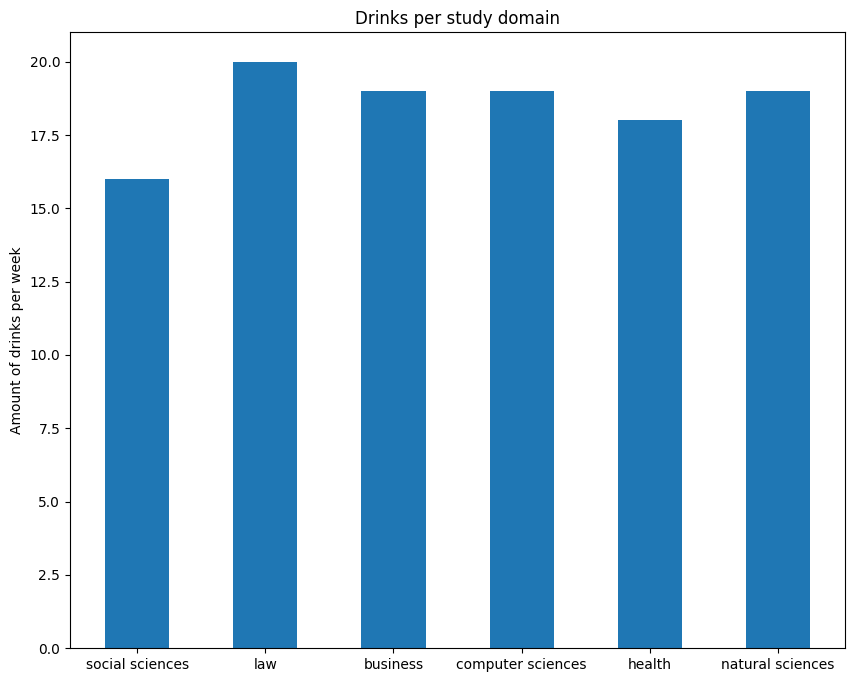

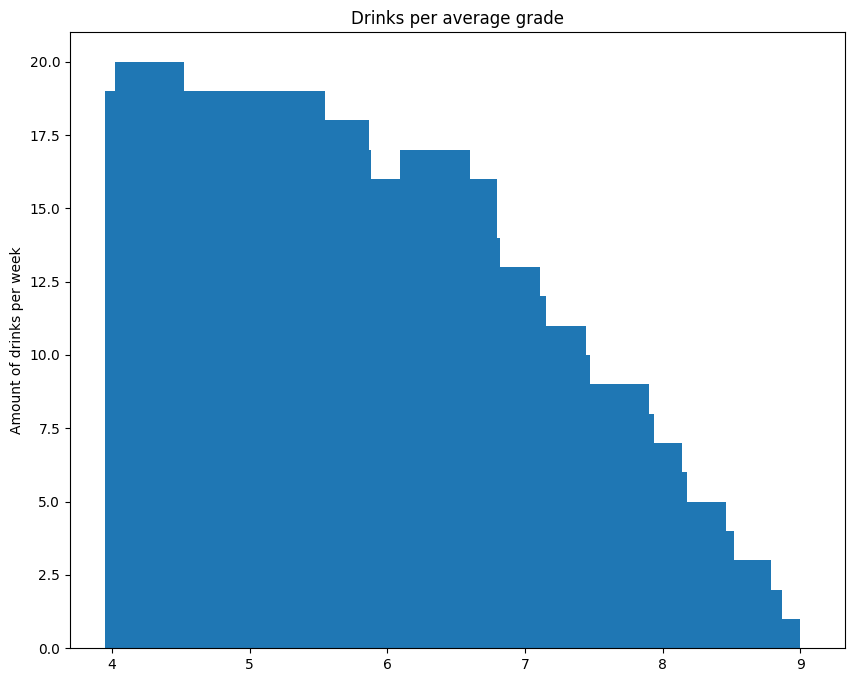

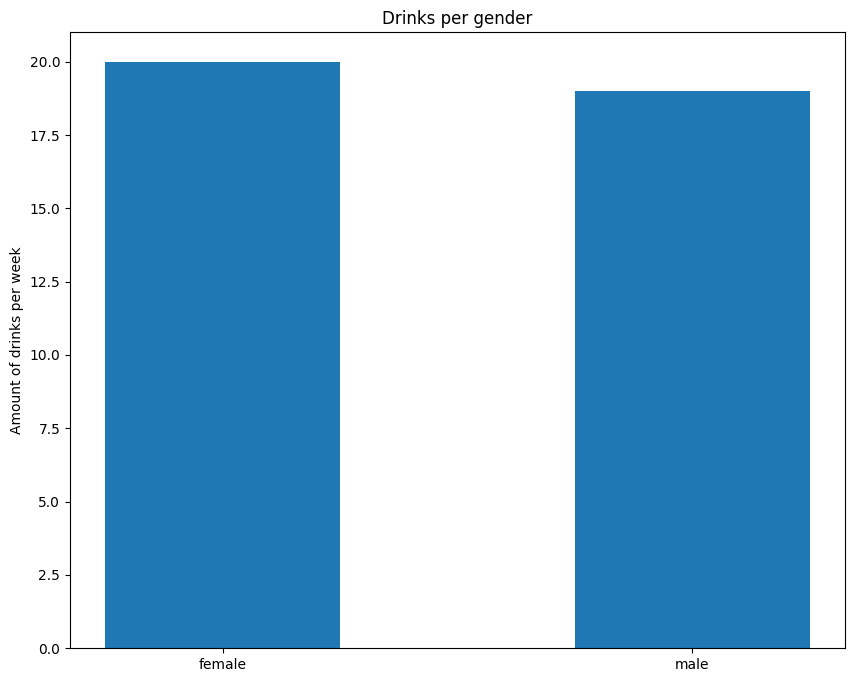

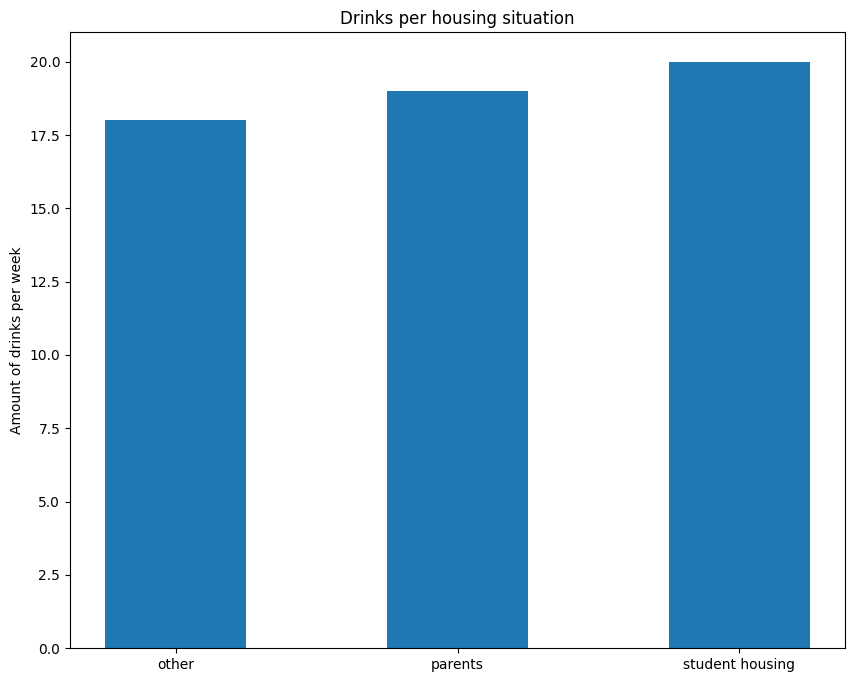

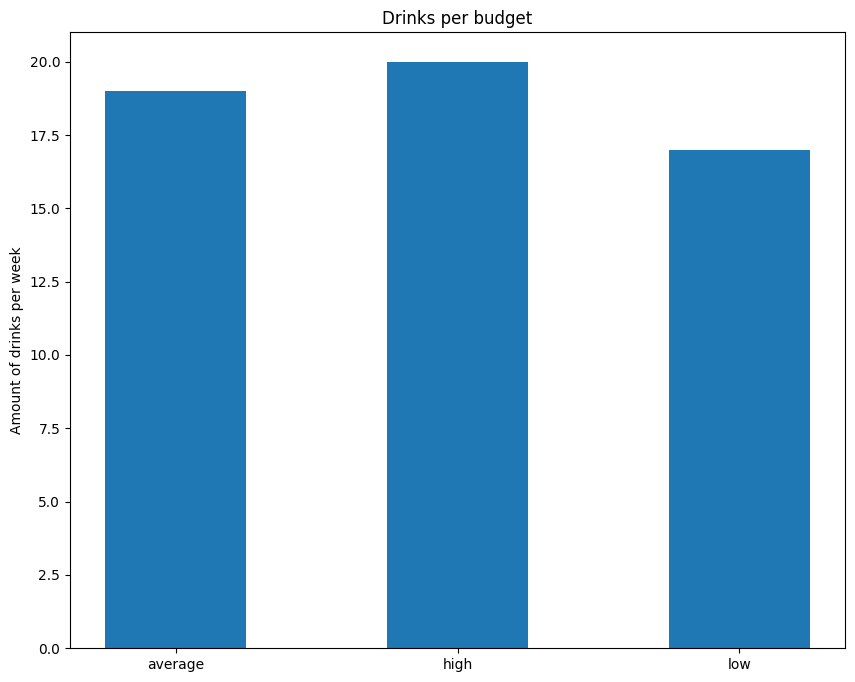

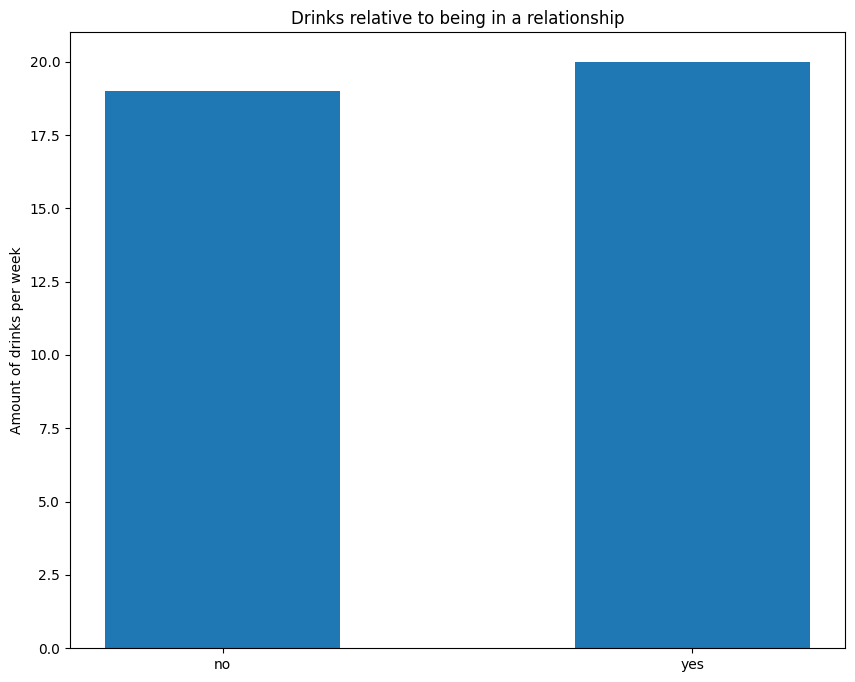

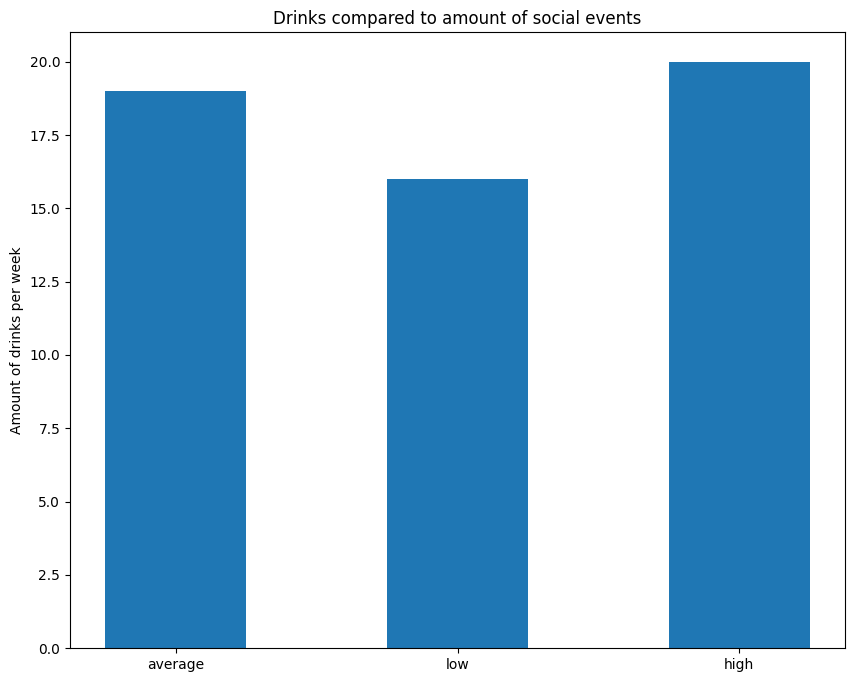

In [6]:
x_sd = df['study_domain']
x_ag = df['avg_grade']
x_g = df['gender']
x_h = df['housing']
x_b = df['budget']
x_r = df['relationship']
x_se = df['social_events']
y = df['drinks']

plt.figure(figsize=(10, 8))
plt.title('Drinks per study domain')
plt.ylabel('Amount of drinks per week')
plt.bar(x_sd,y,width=0.5) #drinks per studies
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Drinks per average grade')
plt.ylabel('Amount of drinks per week')
plt.bar(x_ag,y,width=0.5) #drinks per grade
plt.show()

plt.figure(figsize=(10, 8)) 
plt.title('Drinks per gender')
plt.ylabel('Amount of drinks per week')
plt.bar(x_g,y,width=0.5) #drinks per gender
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Drinks per housing situation')
plt.ylabel('Amount of drinks per week')
plt.bar(x_h,y,width=0.5) #drinks per housing
plt.show()

plt.figure(figsize=(10, 8)) 
plt.title('Drinks per budget')
plt.ylabel('Amount of drinks per week')
plt.bar(x_b,y,width=0.5) #drinks per budget
plt.show()

plt.figure(figsize=(10, 8)) 
plt.title('Drinks relative to being in a relationship')
plt.ylabel('Amount of drinks per week')
plt.bar(x_r,y,width=0.5) #drinks per relationship
plt.show()

plt.figure(figsize=(10, 8)) 
plt.title('Drinks compared to amount of social events')
plt.ylabel('Amount of drinks per week')
plt.bar(x_se,y,width=0.5) #drinks per social event
plt.show()

I have chosen to zoom this experiment in on avg_grade as it is the only variable you can objectively divide into lower being bad and higher being good.
The graph that compares the amount of drinks students had to their average grade is very Right-Skewed, meaning that most of the students that drink alot every week do not have a high average grade. 

Besides the avg_grade there are some other central tendencies such as: that on average law students have the most drinks per week and social sciences students the least, students with a higher budget tend to have more drinks, the amount of social events a student goes to increases their amount of drinks per week, students living in student housing drink more, students who are in a relationship tend to drink more and on average female students drink slightly more than male students.

Question 2: propability of consuming on avarage more than 4 drinks higher for male or female

In [7]:
amt_males = (df['gender'] == 'male').sum()
amt_females = (df['gender'] == 'female').sum()
print('Amount of male students:', amt_males)
print('Amount of female students:', amt_females)

male_4drinks = ((df['gender'] == 'female') & (df['drinks'] > 4)).sum()
print("Number of male students consuming more than 4 drinks per week:", male_4drinks)

female_4drinks = ((df['gender'] == 'male') & (df['drinks'] > 4)).sum()
print("Number of female students consuming more than 4 drinks per week:", female_4drinks)

Amount of male students: 171
Amount of female students: 166
Number of male students consuming more than 4 drinks per week: 89
Number of female students consuming more than 4 drinks per week: 102


In [8]:
print('percentage chance that a male student has more than 4 drinks per week:',male_4drinks/amt_males*100)
print('percentage chance that a female student has more than 4 drinks per week:',female_4drinks/amt_females*100)

percentage chance that a male student has more than 4 drinks per week: 52.046783625730995
percentage chance that a female student has more than 4 drinks per week: 61.44578313253012


The conclusion is that the probability of consuming on average more than 4 alcoholic drinks per week is higher for female students than male students.

Question 3:

In [12]:
mean_grade = np.mean(df['avg_grade']) 
print('The average mean grade for the course is:', mean_grade)

The average mean grade for the course is: 7.027952522255193


This means that this years grades meet the benchmark and on average their students are performing better than expected.

Question 4A:

Eerst descriptive letterlijk beantwoorden en dan inferential ttest doen?

Report per question the results of the descriptive analysis and inferential statistical
analysis.

o In the descriptive analysis, report for numerical data appropriate measures of
central tendency and variation and the distribution (skewness) of the numerical
data or for categorical data frequencies of values. Use visualizations like
histograms or frequency tables for ease of reading.

o In the inferential analysis, report the step-by-step plan for hypothesis testing
including the results.

• Instructions to answer question 4A: The national Alcohol Awareness Group (AAG) defined
a scale for alcohol use in which drinking 1-2 drinks per week is considered little, 3-4 drinks
is considered tolerable and more than 4 is considered a lot (and of course there is the
category none). 
Use these categories to create a new categorical variable named
‘drinks_cat’ based on the numerical variable ‘drinks’ in the dataset. Use this new variable
to answer question 4A on the relationship between alcohol use and average grades.

How to go about the examination of these questions?
To illustrate how you could examine these questions, Southwestern University gives you the following
example. Suppose you examine whether male students consume on average significantly more alcohol
than female students. In the descriptive analysis you would report the mean and standard deviation of
the alcohol consumption of males and females separately. In your inferential analysis you would test the
hypothesis that males consume more alcohol than females. Based on the outcome of this analysis, you
would formulate advice on whether the target group of Southwestern University’s campaign should be
males, females, or both.

dus voor descriptive van 4A de mean grade en standard deviation van de grades van de studenten in de AAG categories en maak een histgram of frequency table voor het reporten op skewness. 
In de inferential test ik de hypothesis dat studenten met een hogere grade minder alcohol drinken en daar base ik een advice op.

In [16]:
#0 is none, 1-2 is little, 3-4 tolerable, >4 is a lot
def c_drinks(drinks):           #create categories based on the amount of drinks
    if drinks == 0:
        return "None"
    elif 1 <= drinks <= 2:
        return "Little"
    elif 3 <= drinks <= 4:
        return "Tolerable"
    else:
        return "A_lot"

df["drinks_cat"] = df["drinks"].apply(c_drinks) #adding the variables to the dataset under the column drinks_cat

df.head()

,survey_id,gender,study_domain,study_year,avg_grade,housing,budget,relationship,social_events,drinks,drinks_cat
0,acd7283f-8d05-4d1b-a1e7-4d09327e04b0,female,social sciences,fourth,7.45,other,average,no,average,6,A_lot
1,91e1cf0e-fd57-4cfe-b485-c34ae4130816,female,law,fourth,6.85,parents,high,yes,average,9,A_lot
2,fcd6549e-ca3f-44cd-9f10-589f904bea47,female,business,fourth,7.53,student housing,average,no,average,4,Tolerable
3,1947f389-988a-4085-9156-7eb3768a3c75,female,computer sciences,third,7.16,student housing,average,yes,low,2,Little
4,296ec3d0-c708-4f87-8d1b-2e9fa2331efd,male,health,second,7.84,parents,high,yes,low,2,Little


In [18]:
none_students = df[df['drinks_cat'] == 'None']
little_students = df[df['drinks_cat'] == 'Little']
Tolerable_students = df[df['drinks_cat'] == 'Tolerable']
A_lot_students = df[df['drinks_cat'] == 'A_lot']

print("Mean grade none students:", none_students['avg_grade'].mean())
print("Mean grade little students:", little_students['avg_grade'].mean())
print("Mean grade Tolerable students:", Tolerable_students['avg_grade'].mean())
print("Mean grade A_lot students:", A_lot_students['avg_grade'].mean())

Mean grade none students: 7.904814814814815
Mean grade little students: 7.884489795918367
Mean grade Tolerable students: 7.529571428571428
Mean grade A_lot students: 6.500418848167539


In [21]:
print("Standard deviation None students:", (np.std(none_students['avg_grade'], ddof=0)))
print("Standard deviation Little students:", (np.std(little_students['avg_grade'], ddof=0)))
print("Standard deviation Tolerable students:", (np.std(Tolerable_students['avg_grade'], ddof=0)))
print("Standard deviation A_lot students:", (np.std(A_lot_students['avg_grade'], ddof=0)))

#moet ik hier elke los de standard deviation pakken of is het de bedoeling dat ik de standard deviation van avg_grade in het algemeen pak? dit leek me logisch aangezien dit is waar de hele vraag over gaat

Standard deviation None students: 0.5857592121301517
Standard deviation Little students: 0.5679503471560274
Standard deviation Tolerable students: 0.5453843617494145
Standard deviation A_lot students: 0.8517464856840403


Moet nog iets met skewness en moet de inferential test nog doen (zie barts file)